# IA898A - Processamento Digital de Imagens

## Técnicas de focalização (Aguçamento) - Jupyter Notebook

### Marcio Albano Hermelino Ferreira

In [12]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from scipy.signal import convolve2d as conv2
from skimage import color, data, restoration

import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia


#### IMPORTANTE: Para o carregamento correto das imagens e bibliotecas

 
 - foi considerado que este notebook estava no caminho '/ia898/2S2018'. **(mesmo local que os exercícios estão no repositório da disciplina).**
 - A figura da Lena (lena.pgm) foi colocada no diretório '/ia898/data.'
 **(mesmo local que as demais imagens do repositório estão).**

Caso caso os arquivos sejam mudados de lugar, será necessário fazer alterações nas referências de caminho utilizadas no código.

In [13]:
pwd

'/home/marcio/progs/ia898/2S2018'

### Uso do Filtro de Wiener

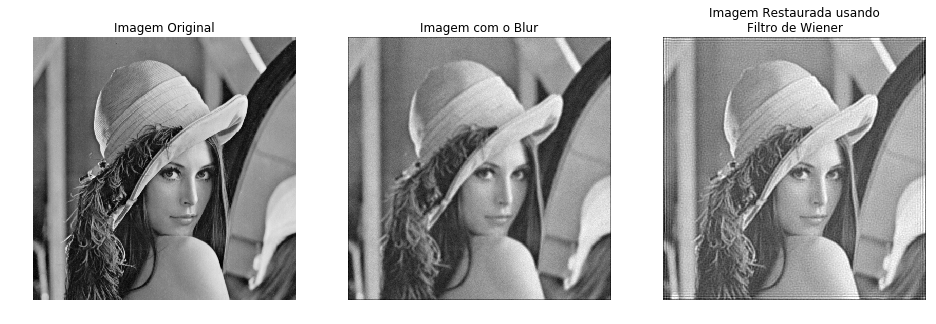

In [14]:
I2 = mpimg.imread('../data/lena.pgm')
psf = np.ones((5,5)) / 25


#degradação
wimg = conv2(I2, psf,'same')

#Ruído
wimg += 0.1 * wimg.std() * np.random.standard_normal(I2.shape)

I2n = ia.normalize(wimg,[0,1])

#execução da deconvolução com o filtro de wiener
deconvolved, _ = restoration.unsupervised_wiener(I2n, psf)


#exibição dos plots
ig, cx = plt.subplots(nrows=1, ncols=3, figsize=(16, 10))
plt.gray()

for c in (cx[0], cx[1], cx[2]):
       c.axis('off')

cx[0].imshow(I2)
cx[0].set_title('Imagem Original')

cx[1].imshow(wimg)
cx[1].set_title('Imagem com o Blur')

cx[2].imshow(deconvolved)
cx[2].set_title('Imagem Restaurada usando\nFiltro de Wiener')


plt.show()



### Uso da deconvolução de Richardson-Lucy

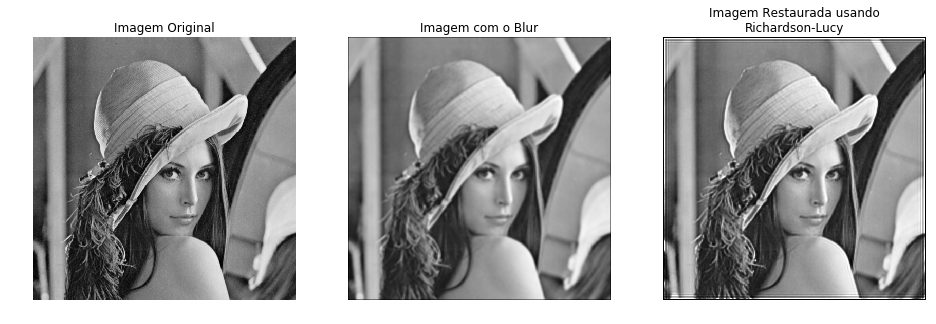

In [20]:
I1 = mpimg.imread('../data/lena.pgm')


#Degradação
psf = np.ones((5, 5)) / 25
I1C = conv2(I1, psf, 'same')

#adição de ruido
I_noisy = I1C.copy()
I_noisy += (np.random.poisson(lam=60, size=I1.shape) - 10) / 255.

#normalização 
I1n = ia.normalize(I_noisy, [0,1])

#deconvolução de Richardson-Lucy
deconvolved_RL2 = restoration.richardson_lucy(I1n, psf, iterations=25)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 10))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(I1)
ax[0].set_title('Imagem Original')

ax[1].imshow(I_noisy)
ax[1].set_title('Imagem com o Blur')

ax[2].imshow(deconvolved_RL2, vmin=I1n.min(), vmax=I1n.max())
ax[2].set_title('Imagem Restaurada usando\nRichardson-Lucy')

plt.show()

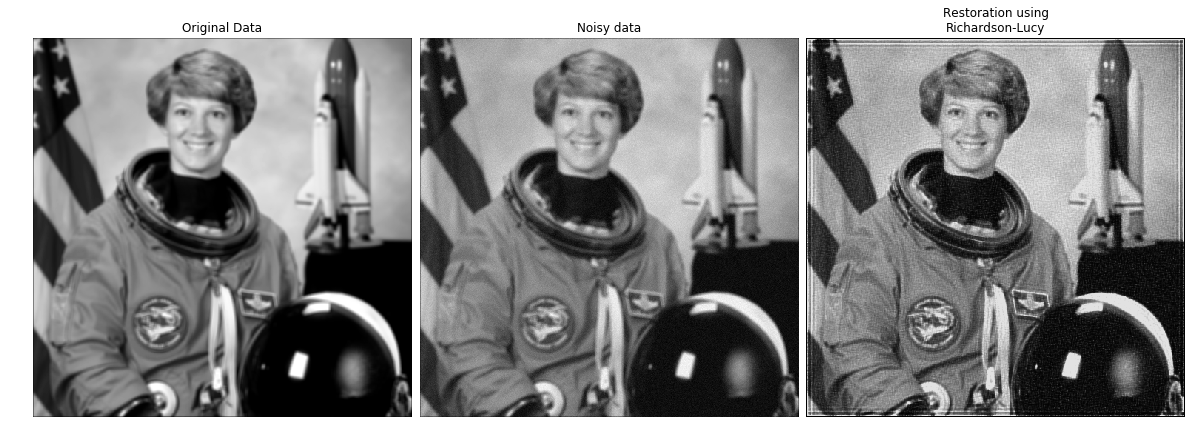

In [16]:
#Exemplo Retirado da Documentação da Biblioteca skimage

import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration

astro = color.rgb2gray(data.astronaut())

psf = np.ones((5, 5)) / 25
astro = conv2(astro, psf, 'same')
# Add Noise to Image
astro_noisy = astro.copy()
astro_noisy += (np.random.poisson(lam=25, size=astro.shape) - 10) / 255.

# Restore Image using Richardson-Lucy algorithm
deconvolved_RL = restoration.richardson_lucy(astro_noisy, psf, iterations=30)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 10))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(astro)
ax[0].set_title('Original Data')

ax[1].imshow(astro_noisy)
ax[1].set_title('Noisy data')

ax[2].imshow(deconvolved_RL, vmin=astro_noisy.min(), vmax=astro_noisy.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

### Comparações Entre Métodos

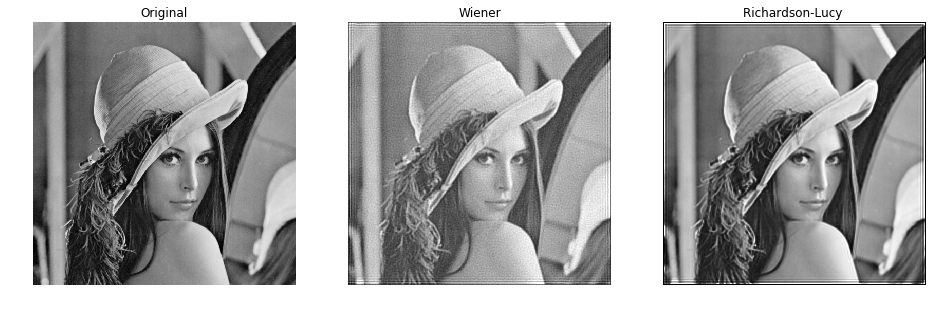

In [21]:
#plots para comparações
plt.subplots(figsize=(16, 10))


plt.subplot(1,3,1)
plt.axis('off')
plt.title("Original")
plt.imshow(I2,'gray')
plt.subplot(1,3,2)
plt.axis('off')
plt.title("Wiener")
plt.imshow(deconvolved)
plt.subplot(1,3,3)
plt.axis('off')
plt.title("Richardson-Lucy ")
plt.imshow(deconvolved_RL2, vmin=I1n.min(), vmax=I1n.max())
